# Projet EMBD

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\2803552286.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [4]:
df = pd.read_csv('C:/Users/guibe/OneDrive/Documents/ENSAE/3A/S1/EMBD/project/data/freq_exposition_achat_merged2.csv').drop(columns=['Unnamed: 0'])
df.columns, df['customer_id'].nunique()

(Index(['customer_id', 'sales', 'quantity', 'Add to cart', 'Order',
        'Product Page View', 'freq_react', 'device_id', 'freq_tv', 'dsp_id',
        'freq_prog', 'freq_totale'],
       dtype='object'),
 35388)

In [12]:
# the frequence of exposition to advertising is very different from one cutomer to an other
df[['freq_totale', 'freq_tv', 'freq_prog']].describe()

,freq_totale,freq_tv,freq_prog
count,35388.000000,35388.000000,35388.000000
mean,7.929298,3.401294,4.528004
std,9.016122,5.591288,7.100519
min,2.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000
50%,5.000000,2.000000,2.000000
75%,9.000000,4.000000,5.000000
max,163.000000,162.000000,135.000000


c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='freq_totale', ylabel='Density'>

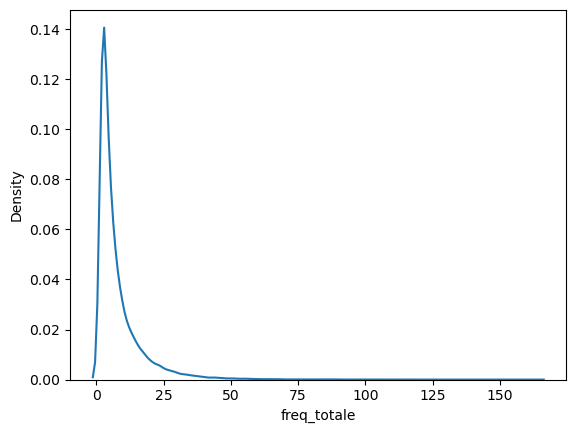

In [14]:
# the majority of the clients are only exposed a fiew times (less then 10 times over 6 months)
sns.kdeplot(df['freq_totale'])

In [11]:
# the frequence of reaction (number of page view, add to cart and order over 6 months) is also very different
df[['freq_react', 'Product Page View', 'Add to cart', 'Order']].describe()

,freq_react,Product Page View,Add to cart,Order
count,35388.000000,35388.000000,35388.000000,35388.000000
mean,7.744800,4.917232,1.664067,1.163502
std,12.375764,8.619300,3.127668,2.402523
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000
75%,9.000000,5.000000,2.000000,1.000000
max,410.000000,342.000000,59.000000,45.000000


c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='freq_react', ylabel='Density'>

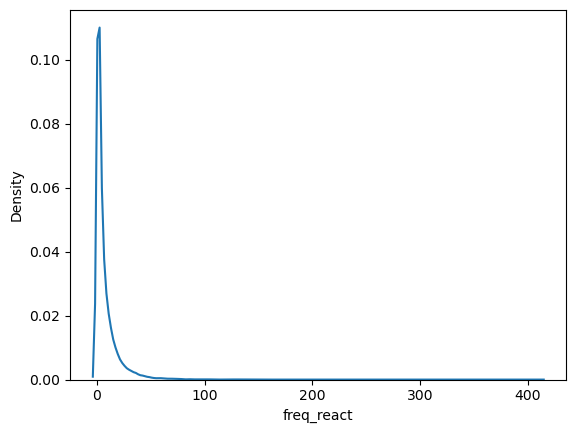

In [15]:
# the majority also doesn't show much reaction
sns.kdeplot(df['freq_react'])

# det cap graphiquement

# First idea : 

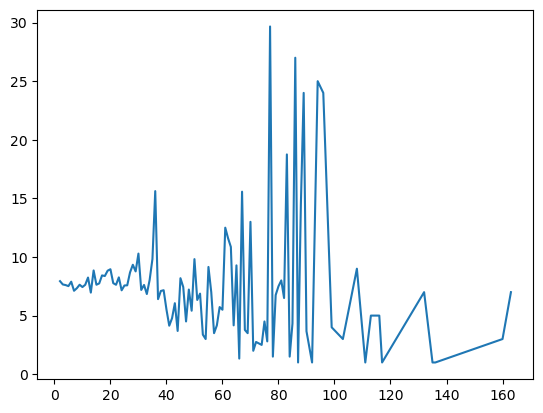

In [18]:
plot_df = df.groupby('freq_totale')['freq_react'].mean().reset_index()
x1 = plot_df['freq_totale']
y1 = plot_df['freq_react']
plt.plot(x1, y1)

In [20]:
plot3 = df.groupby('freq_react')['freq_totale'].count().reset_index()
plot3.columns = ['freq_achat', 'nb_same_freq_achat']
plot3['part_achat'] = (plot3['nb_same_freq_achat']/plot3['nb_same_freq_achat'].sum())*100
plot3.head()

,freq_achat,nb_same_freq_achat,part_achat
0,1.0,10489,29.639991
1,2.0,4623,13.063750
2,3.0,2978,8.415282
3,4.0,2226,6.290268
4,5.0,1760,4.973437


# Second idea

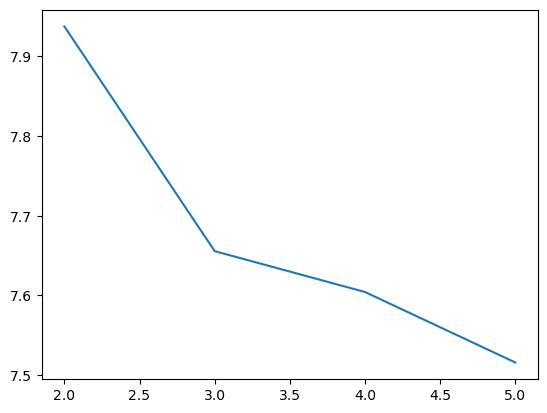

In [8]:
# first group : exposed at most 5 times in 6 months
gp1 = df[df['freq_totale']<=5]
plot_gp1 = gp1.groupby('freq_totale')['freq_react'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['freq_react'])


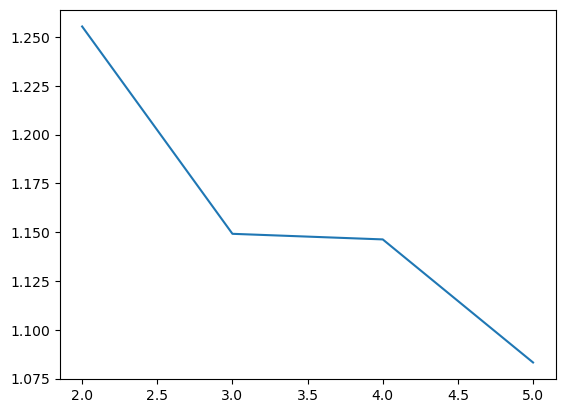

In [11]:
# first group : exposed at most 5 times in 6 months
gp1 = df3[df3['freq_totale']<=5]
plot_gp1 = gp1.groupby('freq_totale')['Order'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['Order'])

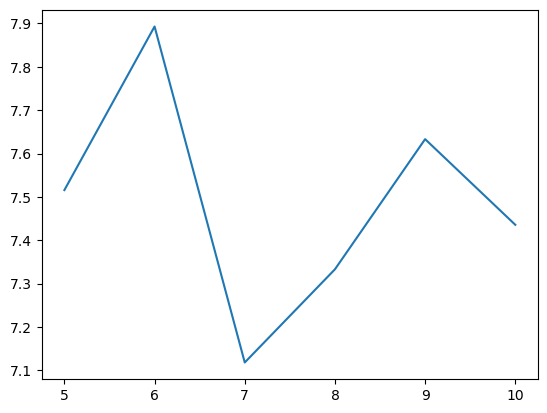

In [13]:
# second group : exposed at most 10 times over 6 months
gp1 = df3[df3['freq_totale'].between(5,10)]
plot_gp1 = gp1.groupby('freq_totale')['freq_react'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['freq_react'])

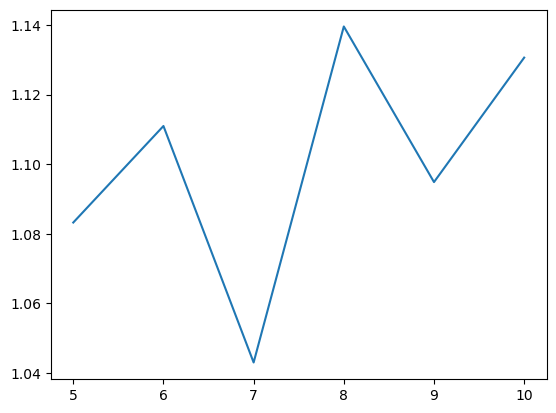

In [14]:
# second group : exposed at most 10 times over 6 months
gp1 = df3[df3['freq_totale'].between(5,10)]
plot_gp1 = gp1.groupby('freq_totale')['Order'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['Order'])

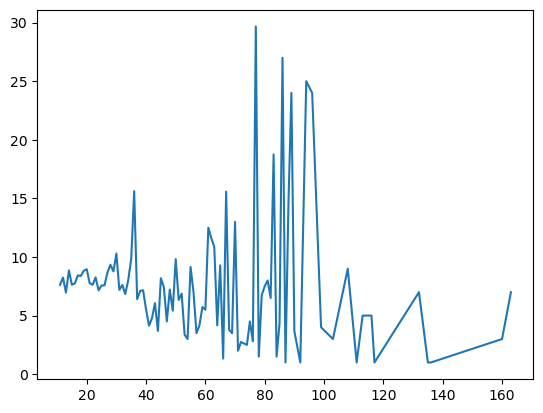

In [15]:
# second group : exposed more than 10 times over 6 months
gp1 = df3[df3['freq_totale'] > 10]
plot_gp1 = gp1.groupby('freq_totale')['freq_react'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['freq_react'])

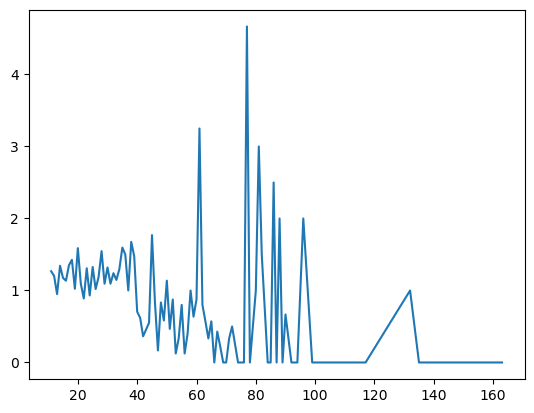

In [16]:
# second group : exposed more than 10 times over 6 months
gp1 = df3[df3['freq_totale'] > 10]
plot_gp1 = gp1.groupby('freq_totale')['Order'].mean().reset_index()
plt.plot(plot_gp1['freq_totale'], plot_gp1['Order'])

# Third idea

In [27]:
df.groupby('freq_totale')['freq_react'].count().reset_index().head(20)

,freq_totale,freq_react
0,2,7959
1,3,5376
2,4,3636
3,5,2823
4,6,2280
5,7,1835
6,8,1426
7,9,1265
8,10,1003
9,11,823


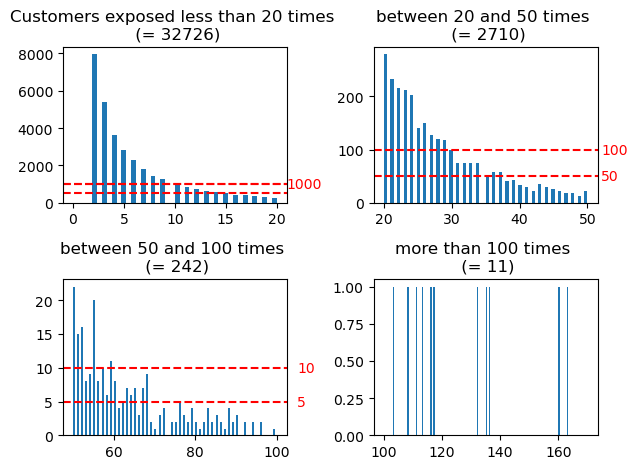

In [189]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(df['freq_totale'], 42, range=[0,20], histtype='bar')
ax0.axhline(y=1000, color='r', linestyle='--')
ax0.axhline(y=500, color='r', linestyle='--')
y_value = 1000
ax0.axhline(y=y_value, color='r', linestyle='--', label=f'{y_value}')
ax0.text(21, y_value, f'{y_value}', color='r', va='center', ha='left')
ax0.set_title('Customers exposed less than 20 times \n (= 32726)')

ax1.hist(df['freq_totale'], bins=62, range=[20,50], histtype='bar')
ax1.axhline(y=100, color='r', linestyle='--')
ax1.text(52, 100, f'100', color='r', va='center', ha='left')
ax1.axhline(y=50, color='r', linestyle='--')
ax1.text(52, 50, f'50', color='r', va='center', ha='left')
ax1.set_title('between 20 and 50 times \n (= 2710)')

ax2.hist(df['freq_totale'], bins = 100, range=[50, 100], histtype='bar')
ax2.axhline(y=10, color='r', linestyle='--')
ax2.text(105, 10, f'10', color='r', va='center', ha='left')
ax2.axhline(y=5, color='r', linestyle='--')
ax2.text(105, 5, f'5', color='r', va='center', ha='left')
ax2.set_title('between 50 and 100 times \n (= 242)')

# Make a multiple-histogram of data-sets with different length.
ax3.hist(df['freq_totale'], bins= 140, range=[100, 170], histtype='bar')
ax3.set_title('more than 100 times \n (= 11)')

fig.tight_layout()
plt.show()

In [127]:
# group 1 : less than 10
# they have a very similar average reaction
group1 = df[df['freq_totale'] <=10][['freq_totale', 'freq_react']]
group1_agg = group1.groupby('freq_totale').count().reset_index()
group1_agg['min_react'] = group1.groupby('freq_totale').min().values
group1_agg['max_react'] = group1.groupby('freq_totale').max().values
group1_agg['avg_react'] = group1.groupby('freq_totale').mean().values
group1_agg

,freq_totale,freq_react,min_react,max_react,avg_react
0,2,7959,1.0,385.0,7.937555
1,3,5376,1.0,111.0,7.655506
2,4,3636,1.0,207.0,7.604235
3,5,2823,1.0,146.0,7.515763
4,6,2280,1.0,410.0,7.892982
5,7,1835,1.0,130.0,7.118256
6,8,1426,1.0,236.0,7.333100
7,9,1265,1.0,235.0,7.633202
8,10,1003,1.0,122.0,7.435693


C:\Users\guibe\AppData\Local\Temp\ipykernel_26976\2837520619.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('advertisement_bin')['freq_react'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


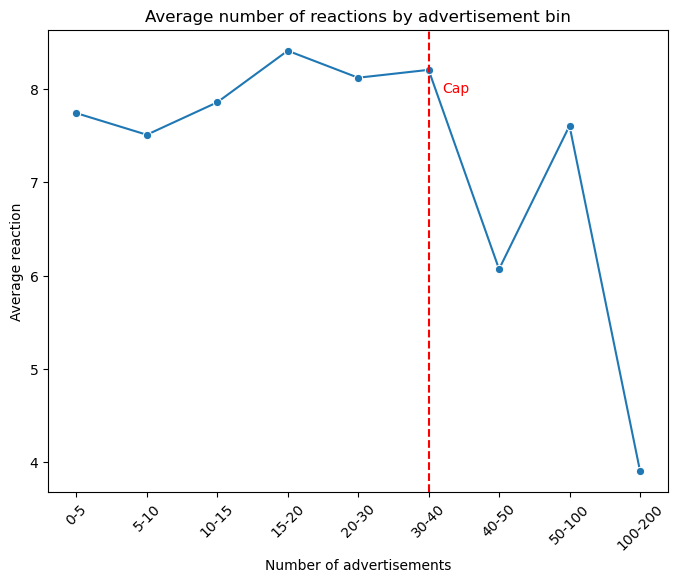

In [167]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
df['advertisement_bin'] = pd.cut(df['freq_totale'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = df.groupby('advertisement_bin')['freq_react'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='freq_react', marker='o')
plt.axvline(x=5, color='r', linestyle='--')
plt.text(5.2, 8, f'Cap', color='r', va='center', ha='left')
plt.title('Average number of reactions by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average reaction')
plt.xticks(rotation=45)  
plt.show()

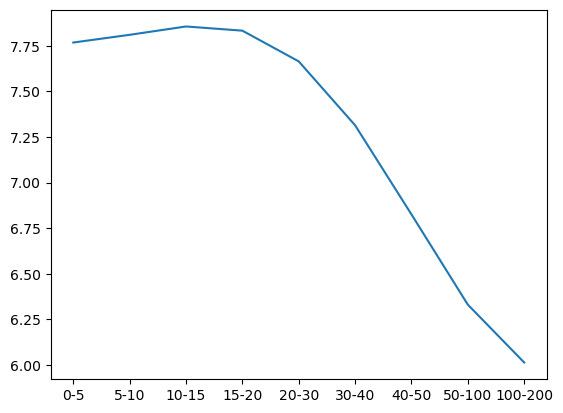

In [149]:
df_grouped['smoothed'] = gaussian_filter1d(df_grouped['freq_react'], sigma=2)
plt.plot(df_grouped['advertisement_bin'], df_grouped['smoothed'])

## With the number of order

C:\Users\guibe\AppData\Local\Temp\ipykernel_26976\1990537650.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('advertisement_bin')['Order'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


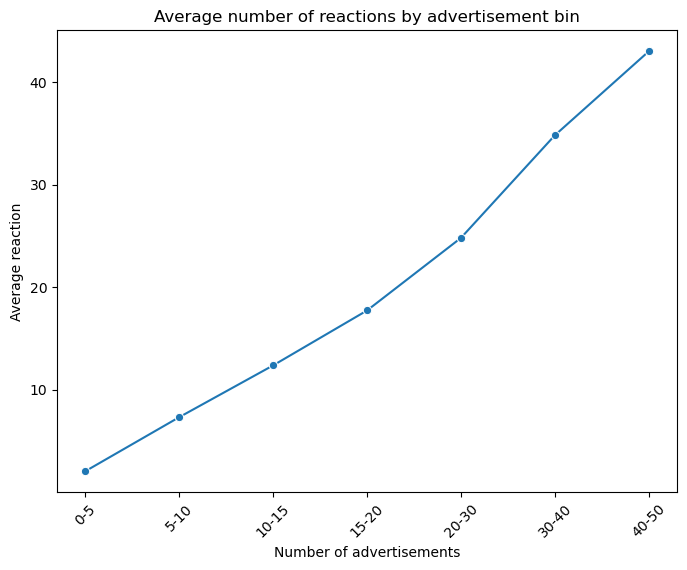

In [191]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
df['advertisement_bin'] = pd.cut(df['Order'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = df.groupby('advertisement_bin')['Order'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='Order', marker='o')
plt.title('Average number of reactions by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average reaction')
plt.xticks(rotation=45)  
plt.show()

C:\Users\guibe\AppData\Local\Temp\ipykernel_26976\290094252.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('advertisement_bin')['Product Page View'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


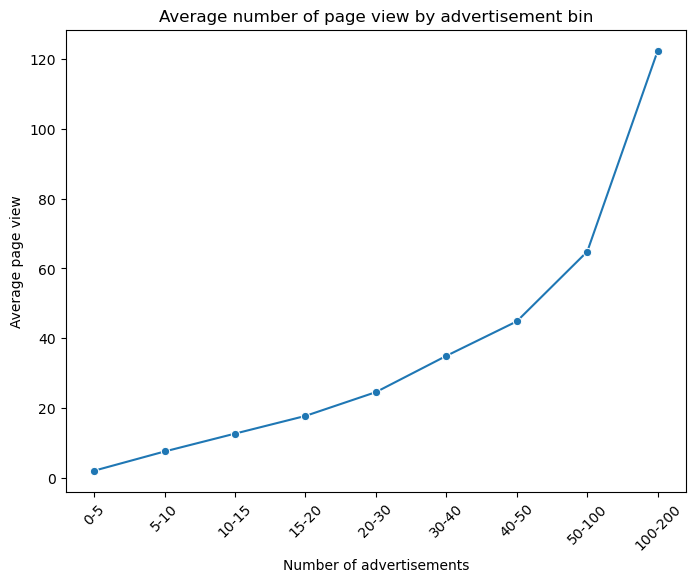

In [193]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
df['advertisement_bin'] = pd.cut(df['Product Page View'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = df.groupby('advertisement_bin')['Product Page View'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='Product Page View', marker='o')
plt.title('Average number of page view by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average page view')
plt.xticks(rotation=45)  
plt.show()

## are there better threshold?

In [178]:
df_sorted = df.sort_values(by='freq_totale')
n_bins = 10

# Use qcut to divide the data into bins with equal number of customers
# This will divide customers into 5 bins based on their number of advertisements seen
df_sorted['advertisement_bin'] = pd.qcut(df_sorted['freq_totale'], q=n_bins, duplicates='drop')

# Step 4: Calculate the average number of orders per bin
df_grouped = df_sorted.groupby('advertisement_bin')['freq_react'].mean().reset_index()
df_grouped

C:\Users\guibe\AppData\Local\Temp\ipykernel_26976\2000765756.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby('advertisement_bin')['freq_react'].mean().reset_index()


,advertisement_bin,freq_react
0,"(1.999, 3.0]",7.823847
1,"(3.0, 4.0]",7.604235
2,"(4.0, 5.0]",7.515763
3,"(5.0, 6.0]",7.892982
4,"(6.0, 8.0]",7.212205
5,"(8.0, 11.0]",7.567777
6,"(11.0, 18.0]",8.008331
7,"(18.0, 163.0]",8.074668


c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 800x600 with 0 Axes>

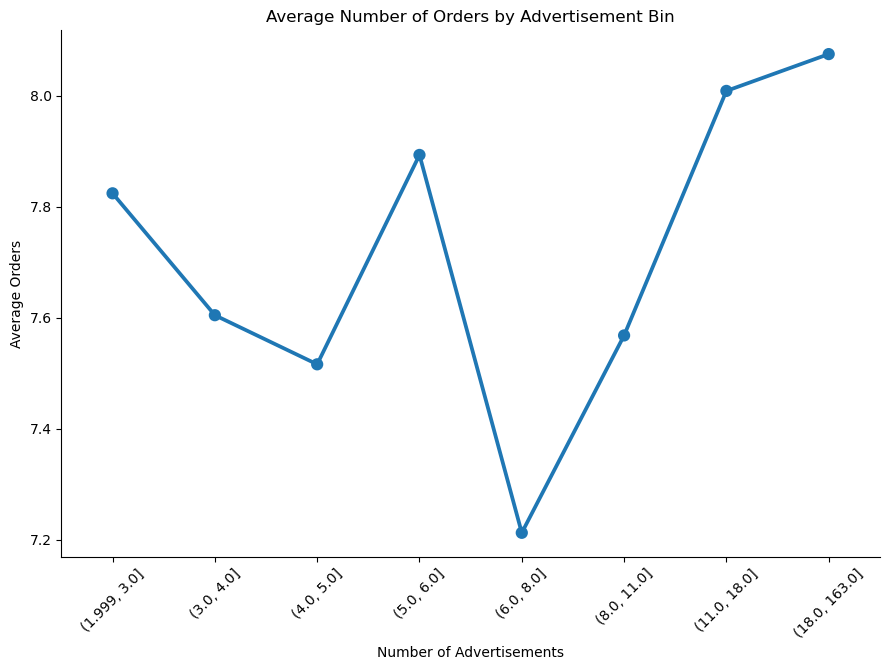

In [172]:
# Step 5: Plot the results
plt.figure(figsize=(8,6))
sns.catplot(data=df_grouped, x='advertisement_bin', y='freq_react', kind='point', height=6, aspect=1.5)
plt.title('Average Number of Orders by Advertisement Bin')
plt.xlabel('Number of Advertisements')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.show()

Thresholds where the customer count drops substantially: Index([3, 4, 5, 6, 7, 8, 10, 11, 9, 13], dtype='int64', name='freq_totale')


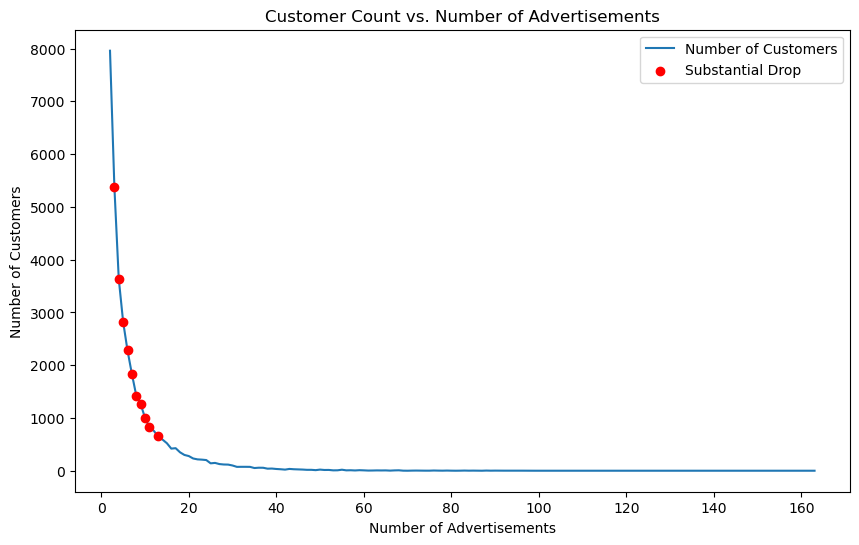

In [181]:
# Step 1: Calculate the frequency of each unique value of 'advertisements'
advertisement_counts = df['freq_totale'].value_counts().sort_index()

# Step 2: Calculate the difference in counts between consecutive values
count_diffs = advertisement_counts.diff().abs()  # Absolute differences

# Step 3: Identify thresholds where the difference is large (e.g., top 10 largest differences)
thresholds = count_diffs.nlargest(10).index  # Modify the number '5' for more/fewer thresholds

print("Thresholds where the customer count drops substantially:", thresholds)

# Step 4: Plot the customer count and differences to visualize the drops
plt.figure(figsize=(10, 6))
plt.plot(advertisement_counts.index, advertisement_counts.values, label='Number of Customers')
plt.scatter(thresholds, advertisement_counts[thresholds], color='red', label='Substantial Drop', zorder=5)
plt.title('Customer Count vs. Number of Advertisements')
plt.xlabel('Number of Advertisements')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [182]:
thresholds

Index([3, 4, 5, 6, 7, 8, 10, 11, 9, 13], dtype='int64', name='freq_totale')

Detected threshold: 19


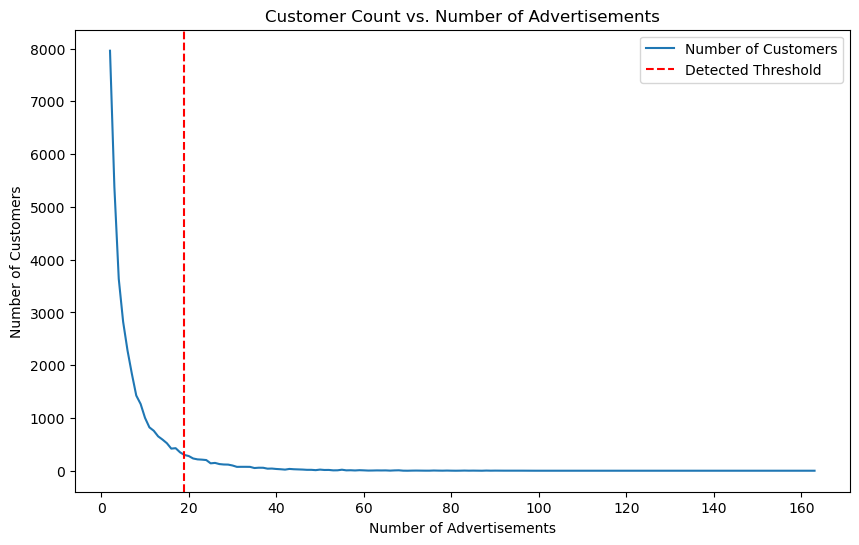

In [185]:
from kneed import KneeLocator
# Step 1: Calculate the frequency of each unique value of 'advertisements'
advertisement_counts = df['freq_totale'].value_counts().sort_index()

# Step 2: Apply the KneeLocator to detect elbow points
kneedle = KneeLocator(advertisement_counts.index, advertisement_counts.values, curve='convex', direction='decreasing')

# Step 3: Get the 'elbow' points (thresholds)
thresholds = kneedle.elbow

print(f"Detected threshold: {thresholds}")

# Step 4: Plot the data and highlight the elbow points
plt.figure(figsize=(10, 6))
plt.plot(advertisement_counts.index, advertisement_counts.values, label='Number of Customers')
plt.axvline(x=thresholds, color='red', linestyle='--', label='Detected Threshold')
plt.title('Customer Count vs. Number of Advertisements')
plt.xlabel('Number of Advertisements')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# With different advertisment type

# With customer segmentation

In [5]:
profiles = pd.read_csv('C:/Users/guibe/OneDrive/Documents/ENSAE/3A/S1/EMBD/project/data/retailer_cluster.csv')
profiles.head()

,Unnamed: 0,customer_id,total_sales,total_quantity,num_brands,num_transactions,recency,purchase_frequency,R_score,F_score,M_score,RFM_Score,Cluster
0,0,re0007V8sqIHsZnbvC,0.00,0.0,1,2,153,0.011050,1,1,1,1.000000,Light
1,1,re000JYhnKbTkPqMB4,0.00,0.0,1,3,174,0.016575,1,2,1,1.333333,Light
2,2,re000fIO9QXTWYjOfn,284.52,8.0,2,23,9,0.127072,3,3,3,3.000000,Heavy
3,3,re000kbtVVzPwZcEr4,0.00,0.0,1,19,36,0.104972,3,3,1,2.333333,Medium
4,4,re000pHbVOysCXRHgt,394.94,5.0,1,17,22,0.093923,3,3,3,3.000000,Heavy


In [8]:
df_prof = df.merge(profiles[['customer_id','Cluster']])
heavy = df_prof[df_prof['Cluster']=='Heavy']
medium = df_prof[df_prof['Cluster']=='Medium']
light = df_prof[df_prof['Cluster']=='Light']

In [33]:
heavy[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,7.473766,3.365195,4.108571,23.020087,4.596364,12.433766,5.989957
std,8.170229,5.346478,6.210332,20.808601,3.914264,15.942204,4.993855
min,2.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,11.000000,2.000000,4.000000,3.000000
50%,4.000000,2.000000,2.000000,17.000000,4.000000,8.000000,5.000000
75%,9.000000,3.000000,4.000000,28.000000,6.000000,15.000000,7.000000
max,88.000000,87.000000,79.000000,410.000000,45.000000,342.000000,59.000000


In [34]:
medium[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000
mean,7.289685,3.346937,3.942748,9.677334,1.372284,6.270699,2.034351
std,8.188040,5.541228,6.102157,8.949726,1.461182,7.356664,2.085313
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,1.000000
50%,4.000000,2.000000,2.000000,7.000000,1.000000,4.000000,2.000000
75%,9.000000,3.000000,4.000000,12.000000,2.000000,8.000000,3.000000
max,163.000000,162.000000,131.000000,137.000000,20.000000,127.000000,27.000000


In [35]:
light[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000
mean,8.401908,3.440681,4.961227,2.178345,0.031348,1.966074,0.180923
std,9.624528,5.687972,7.776483,2.432338,0.178356,2.208990,0.537744
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,5.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,10.000000,4.000000,5.000000,2.000000,0.000000,2.000000,0.000000
max,160.000000,158.000000,135.000000,68.000000,2.000000,61.000000,12.000000


In [39]:
df[df['freq_totale']> 100]

,customer_id,sales,quantity,Add to cart,Order,Product Page View,freq_react,device_id,freq_tv,dsp_id,freq_prog,freq_totale
150,re0F9NsF4r6nYP7FwE,0.00,0.0,0.0,0.0,1.0,1.0,ctvCQGY9E6hl,1,dspV11w0RKU2FBtviNZWqfRagmjxWO,135,136
381,re0gDq4Ly9Z2RnQ9j4,0.00,0.0,1.0,0.0,8.0,9.0,ctvosDYNKNuv,103,dspjhnJiMUUCXYR2AdtojOoxzC41TL,5,108
1397,re2PryTh40NSd29s4Y,0.00,0.0,1.0,0.0,2.0,3.0,ctvKRDtD19Gk,158,dsp3j3r8rzWCRrz2RO4GhjQKivsAja,2,160
4379,re7X8X0rjcURs14vA6,0.00,0.0,2.0,0.0,5.0,7.0,ctvRiAzNYc1H,162,dsp2tT9UOLnErzRcB6MAXNy6f1c80S,1,163
8675,reExTRt4x9smKNj6DO,20.99,1.0,1.0,1.0,5.0,7.0,ctvW6DRPSiQD,1,dsp5cFo5phKkJqDzBRM428tpeFj2CE,131,132
12607,reLrMgQpqZQ4gUGH0B,0.00,0.0,0.0,0.0,3.0,3.0,ctvNtHJUJ9UR,1,dsp33HxGIfbRWpcDTJ7v8E6ZIR0BVf,102,103
14814,rePff3huugsTtfvNkl,0.00,0.0,0.0,0.0,1.0,1.0,ctv67XkssUvX,87,dspLszW8umwSiIE6xDYtIFsiJh3gOU,24,111
18050,reVQGmqLwKyEcEjR02,0.00,0.0,0.0,0.0,1.0,1.0,ctvOrQd6OydS,130,dspL81xypF0B9UNs6zKIeV9TaooJNQ,5,135
19641,reYIGKBgI7yVBLrp3m,0.00,0.0,0.0,0.0,5.0,5.0,ctvUSMRBpM0t,1,dspwm6IjXDNHOfdqPumvYhYV6lTFhI,112,113
22869,ree703i0z4JNBV5ecL,0.00,0.0,0.0,0.0,5.0,5.0,ctv2dHEjulY9,2,dspASmKe7SLvgxvHIxrXXZhpcgvr5b,114,116


C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\315479774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['advertisement_bin'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels)
C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\315479774.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = heavy.groupby('advertisement_bin')['freq_react'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

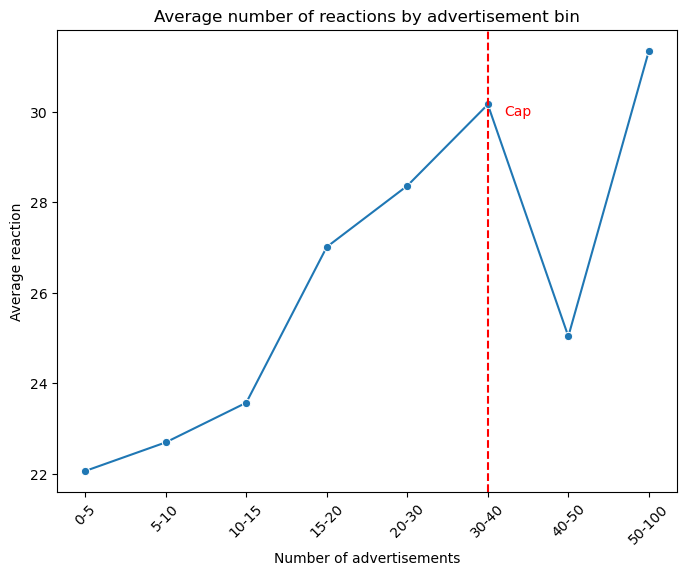

In [15]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
heavy['advertisement_bin'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = heavy.groupby('advertisement_bin')['freq_react'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='freq_react', marker='o')
plt.axvline(x=5, color='r', linestyle='--')
plt.text(5.2, 30, f'Cap', color='r', va='center', ha='left')
plt.title('Average number of reactions by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average reaction')
plt.xticks(rotation=45)  
plt.show()

C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\2149040002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['advertisement_bin'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels)
C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\2149040002.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = medium.groupby('advertisement_bin')['freq_react'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

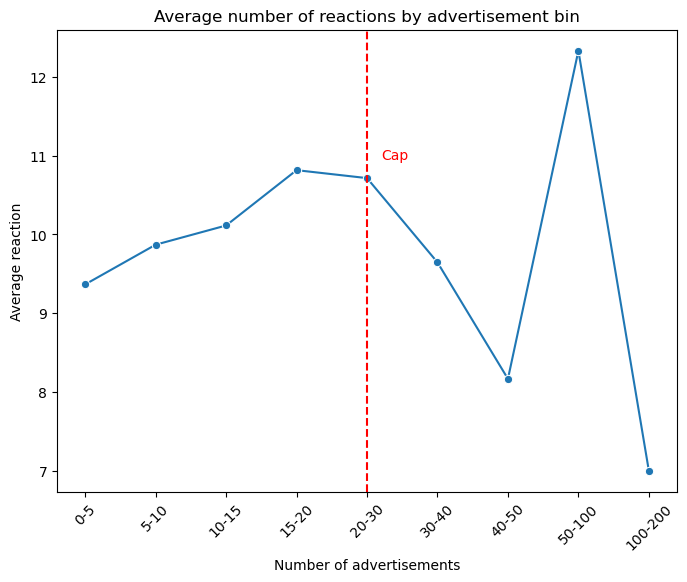

In [40]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
medium['advertisement_bin'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = medium.groupby('advertisement_bin')['freq_react'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='freq_react', marker='o')
plt.axvline(x=4, color='r', linestyle='--')
plt.text(4.2, 11, f'Cap', color='r', va='center', ha='left')
plt.title('Average number of reactions by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average reaction')
plt.xticks(rotation=45)  
plt.show()

C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\4231140026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['advertisement_bin'] = pd.cut(light['freq_totale'], bins=bins, labels=labels)
C:\Users\guibe\AppData\Local\Temp\ipykernel_29148\4231140026.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = light.groupby('advertisement_bin')['freq_react'].mean().reset_index()
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.

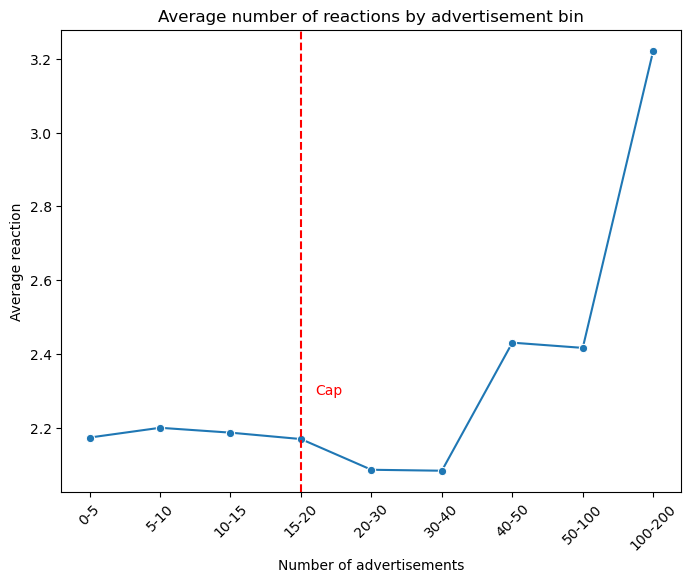

In [25]:
# Step 1: Create bins for the number of advertisements
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 170]  
labels = ['0-5','5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-100', '100-200']
light['advertisement_bin'] = pd.cut(light['freq_totale'], bins=bins, labels=labels)

# Step 2: Calculate the average orders for each bin
df_grouped = light.groupby('advertisement_bin')['freq_react'].mean().reset_index()

# Step 3: Plot the results
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='advertisement_bin', y='freq_react', marker='o')
plt.axvline(x=3, color='r', linestyle='--')
plt.text(3.2, 2.3, f'Cap', color='r', va='center', ha='left')
plt.title('Average number of reactions by advertisement bin')
plt.xlabel('Number of advertisements')
plt.ylabel('Average reaction')
plt.xticks(rotation=45)  
plt.show()

# Calcul of waste

In [43]:
df_prof.loc[df_prof['Cluster']=='Heavy','cap'] = 40
df_prof.loc[df_prof['Cluster']=='Medium','cap'] = 30
df_prof.loc[df_prof['Cluster']=='Light','cap'] = 20
df_prof.head()

,customer_id,sales,quantity,Add to cart,Order,Product Page View,freq_react,device_id,freq_tv,dsp_id,freq_prog,freq_totale,Cluster,cap
0,re00CKn2yOaub2t96K,46.67,1.0,1.0,1.0,6.0,8.0,ctvOeSltoMMJ,2,dspjS8smJIRHKBhwamdxBzZzZh1CJi,1,3,Heavy,40.0
1,re00aRkgItYQpIBs4v,78.98,1.0,2.0,1.0,3.0,6.0,ctv4YVSu6w48,1,dspDxWVaZM9Z4zFgpWlqyCe9YFZ6xk,1,2,Medium,30.0
2,re00fY6oH5hwDeHicN,172.97,3.0,4.0,3.0,16.0,23.0,ctvWuzHNZ43W,1,dspcvhk8ZfZ6nrN3eQMm2Q6pbbM2Gh,1,2,Heavy,40.0
3,re00itkOXBMIgSS7yM,20.49,1.0,1.0,1.0,2.0,4.0,ctvz0yKxiDe6,1,dspcBhtHgoJg7gJTDZXbz8C8K2ysrS,2,3,Light,30.0
4,re00qEtvplbarZyd4l,0.00,0.0,0.0,0.0,1.0,1.0,ctvVVbtu2MuP,4,dspLjyKPkZ7Ugubsr2p30xoXDaQIv8,1,5,Light,30.0


In [45]:
# get cost
cost = pd.read_csv('C:/Users/guibe/OneDrive/Documents/ENSAE/3A/S1/EMBD/project/data/final_matched.csv')
cost.head()

,Unnamed: 0.1,Unnamed: 0,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,dsp_id,device_id,breed,age,income,timestamp_utc_tv,cost_milli_cent_tv,timestamp_utc_prog,campaign_name\t,device_type,cost_milli_cent_prog
0,0,0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho,Purebred,[45-55[,[120-200K$[,2024-04-23 21:09:46,2325.51,2024-02-06 04:10:41,Contextual,Phone,283.496
1,1,1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,ctv81YlbBXho,Purebred,[45-55[,[120-200K$[,2024-04-23 21:09:46,2325.51,2024-02-06 04:10:41,Contextual,Phone,283.496
2,2,549,reWpqrLKjcWSuRWuaA,2024-05-05 17:03:15,Product Page View,NaN,NaN,NaN,NaN,dspdRM4QgzQzPYI4gNJrDLqfRug9Ry,ctvWr7bOO5Je,Purebred,[45-55[,[120-200K$[,2024-04-19 18:31:30,2325.51,2024-01-13 04:28:10,Retargeting,PC,1277.000
3,3,549,reWpqrLKjcWSuRWuaA,2024-05-05 17:03:15,Product Page View,NaN,NaN,NaN,NaN,dspdRM4QgzQzPYI4gNJrDLqfRug9Ry,ctvWr7bOO5Je,Purebred,[45-55[,[120-200K$[,2024-04-19 18:31:30,2325.51,2024-04-19 03:15:19,Retargeting,PC,2678.209
4,4,550,reWpqrLKjcWSuRWuaA,2024-05-05 17:21:55,Product Page View,NaN,NaN,NaN,NaN,dspdRM4QgzQzPYI4gNJrDLqfRug9Ry,ctvWr7bOO5Je,Purebred,[45-55[,[120-200K$[,2024-04-19 18:31:30,2325.51,2024-01-13 04:28:10,Retargeting,PC,1277.000


In [50]:
cost_agg = cost.groupby('customer_id')[['cost_milli_cent_tv', 'cost_milli_cent_prog']].sum().reset_index()
cost_agg['cost_tot'] = cost_agg['cost_milli_cent_tv'] + cost_agg['cost_milli_cent_prog']
cost_agg

,customer_id,cost_milli_cent_tv,cost_milli_cent_prog,cost_tot
0,re00CKn2yOaub2t96K,37208.16,37040.464,74248.624
1,re00aRkgItYQpIBs4v,13953.06,1540.920,15493.980
2,re00fY6oH5hwDeHicN,53486.73,51520.000,105006.730
3,re00itkOXBMIgSS7yM,18604.08,1056.752,19660.832
4,re00qEtvplbarZyd4l,9302.04,1189.924,10491.964
...,...,...,...,...
35383,rezz0jObDfH18vLBhh,2325.51,2047.968,4373.478
35384,rezzAZA0T05ElfyNPG,13953.06,2971.349,16924.409
35385,rezzFKWkSeYe4i5fxq,125577.54,11647.548,137225.088
35386,rezzZOZAcLl7H5MXeq,2325.51,3366.233,5691.743


In [53]:
waste = df_prof.merge(cost_agg)
waste['unit_cost'] = waste['cost_tot']/waste['freq_totale']
waste['waste'] = waste.apply(lambda x : x['unit_cost']*(x['cap'] - x['freq_totale']) if x['cap'] - x['freq_totale']>0 else 0)

KeyError: 'cap'